<a href="https://colab.research.google.com/github/rgalvanmadrid/general/blob/master/TallerRadio_Verano23_Resuelto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Taller de radioastronomía** \
**Escuela de Verano 2023** \
**Autor: Roberto Galván Madrid** \
Estudiante:

In [ ]:
# Se importan las librerías necesarias para hacer el programa
import numpy as np
import matplotlib.pyplot as plt

from skimage import io, draw
from skimage.transform import resize

from astropy.convolution.kernels import CustomKernel
from astropy.convolution import convolve, convolve_fft

from google.colab import files
from io import BytesIO

In [ ]:
'''
Paso 0
Determinar el tamaño del dominio 2D que se usará.
'''
dom_size = 301 # Tamaño del dominio, de preferencia un entero impar.
 # Dominio 2D de la apertura.
apert = np.zeros([dom_size,dom_size])
amp = 1. # Normalización de la iluminación en la apertura.

In [ ]:
'''
Paso 1:
Crear una apertura circular con iluminación constante.
'''
apert_rad = 15 # Radio de la apertura circular.
apert_ctr = [apert.shape[0]/2,apert.shape[0]/2] # Centro de la apertura circular.
xx, yy = draw.ellipse(apert_ctr[0], apert_ctr[1], apert_rad, apert_rad)  # Crear la apertura circular.
apert[xx,yy] = amp

In [ ]:
'''
Paso 2:
Crear el patrón de respuesta del haz del telescopio (Point Spread Function, PSF)
'''
E_field = np.fft.fftshift(np.fft.fft2(apert, norm='ortho')) #Campo eléctrico en el cielo.
beam = np.abs(np.square(E_field)) #El haz, beam, o PSF, es el módulo del campo eléctrico en el cielo.
beam = beam/beam.max() #Normalizar el beam para que el pico sea 1
print('Tamaño de la matriz del beam: {}'.format(beam.shape))

Tamaño de la matriz del beam: (301, 301)


In [ ]:
'''
Paso Extra (solo necesario si el taller se hace online en Google Colab)
'''
# upload the image file
uploaded = files.upload()

# read the image file
image_file = next(iter(uploaded))  # get the first file in the uploaded files
image = io.imread(BytesIO(uploaded[image_file]), as_gray=True)
print(image.shape)

Saving PDS70c.jpg to PDS70c (8).jpg
(1280, 1280)


In [ ]:
'''
Paso 3:
Convolucionar la imagen modelo con el PSF, para obtener la imagen vista por el instrumento
'''
# Leer imagen modelo
#image = io.imread(image_url,as_gray=True)  #Descomentar si no se hace localmente y no en Colab
new_size = dom_size/2
image = resize(image, (new_size, new_size), anti_aliasing=True)
print('Tamaño de la matriz de la imagen: {}'.format(image.shape))


kernel = CustomKernel(beam)
print('Tamaño de la matriz del kernel de convolución: {}'.format(kernel.shape))


#Ejecutar la convolución:
#im_conv = convolve(image, kernel)
im_conv = convolve_fft(image, kernel)


Tamaño de la matriz de la imagen: (150, 150)
Tamaño de la matriz del kernel de convolución: (301, 301)


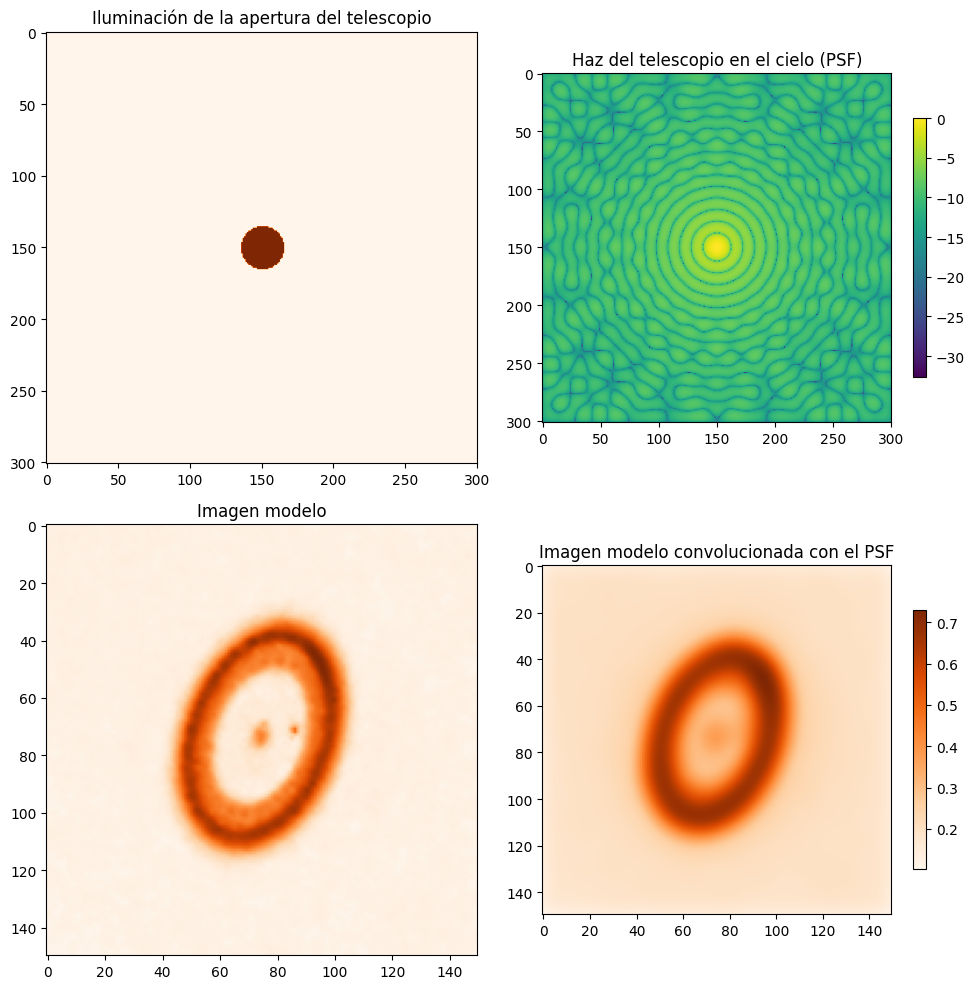

In [ ]:
'''
Paso 4:
Crear, desplegar y guardar las figuras.
'''

fig, ax = plt.subplots(2,2, figsize=(10, 10))



ax[0,0].imshow(apert, cmap='Oranges')
#ax[0,0].set_axis_off()
ax[0,0].set_title('Iluminación de la apertura del telescopio')


im2 = ax[0,1].imshow(np.log(beam))
#ax[0,1].set_axis_off()
plt.colorbar(im2, ax=ax[0,1], shrink=0.6)
ax[0,1].set_title('Haz del telescopio en el cielo (PSF)')

ax[1,0].imshow(np.sqrt(image), cmap='Oranges')
ax[1,0].set_title('Imagen modelo')

im4 = ax[1,1].imshow(np.sqrt(im_conv), cmap='Oranges')
plt.colorbar(im4, ax=ax[1,1], shrink=0.6)
ax[1,1].set_title('Imagen modelo convolucionada con el PSF')


# Show and save plots
plt.tight_layout()
#plt.savefig('taller_radio_apert{}.png'.format(apert_rad), dpi=300)
plt.show()

In [ ]:
'''
Paso 5:
Volver a crear una apertura, pero esta vez incompleta, representando un interferómetro
'''


apert_interf = np.zeros([dom_size,dom_size])
aperture_indices = np.nonzero(apert)
max_nmeas = aperture_indices[0].shape[0]
print("The maximum possible number of measurements (filled aperture) is {}".format(max_nmeas))

# Number of measurements n_meas that the synthetic aperture will have
n_meas = int(max_nmeas/10)
indices = np.random.choice(np.arange(aperture_indices[0].shape[0]), n_meas, replace=False)
for measurement in indices:
    apert_interf[aperture_indices[0][measurement], aperture_indices[1][measurement]] = 1.0

# Create central hole in synthetic aperture
hole_rad = int(apert_rad/5) # Radius of central aperture hole
xx_hole, yy_hole = draw.ellipse(apert_ctr[0], apert_ctr[1], hole_rad, hole_rad)  # Draw central hole
apert_interf[xx_hole,yy_hole] = 0

The maximum possible number of measurements (filled aperture) is 716


In [ ]:
'''
Paso 6:
Crear el patrón de respuesta del haz del telescopio (Point Spread Function, PSF).
En este caso, dado que la apertura es incompleta ("sintetizada"), el PSF corresponde al de un interferómetro.
'''
E_field_interf = np.fft.fftshift(np.fft.fft2(apert_interf, norm='ortho')) #Campo eléctrico en el cielo.
beam_interf = np.abs(np.square(E_field_interf)) #El haz, beam, o PSF, es el módulo del campo eléctrico en el cielo.
beam_interf = beam_interf/beam_interf.max() #Normalizar el beam para que el pico sea 1
print('Tamaño de la matriz del beam: {}'.format(beam_interf.shape))

Tamaño de la matriz del beam: (301, 301)


In [ ]:
'''
Paso 7:
Convolucionar la imagen modelo con el PSF interferométrico, para obtener la imagen vista por el instrumento
'''

kernel_interf = CustomKernel(beam_interf)
print('Tamaño de la matriz del kernel de convolución: {}'.format(kernel_interf.shape))


#Ejecutar la convolución:
#im_conv = convolve(image, kernel)
im_conv_interf = convolve_fft(image, kernel_interf)


Tamaño de la matriz del kernel de convolución: (301, 301)


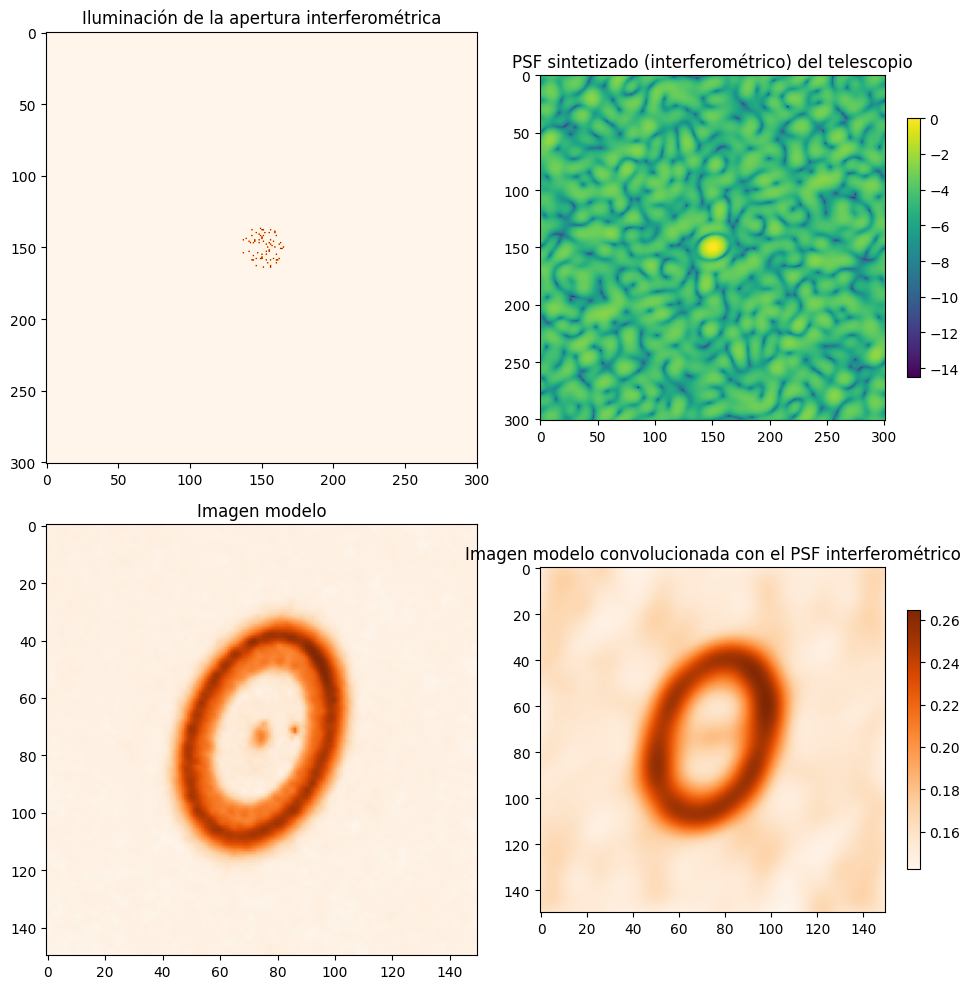

In [ ]:
'''
Paso 8:
Crear, desplegar y guardar las figuras para el caso interferométrico
'''

fig, ax = plt.subplots(2,2, figsize=(10, 10))


ax[0,0].imshow(apert_interf, cmap='Oranges')
#ax[0,0].set_axis_off()
ax[0,0].set_title('Iluminación de la apertura interferométrica')


im2 = ax[0,1].imshow(np.log(beam_interf))
#ax[0,1].set_axis_off()
plt.colorbar(im2, ax=ax[0,1], shrink=0.6)
ax[0,1].set_title('PSF sintetizado (interferométrico) del telescopio')

ax[1,0].imshow(np.sqrt(image), cmap='Oranges')
ax[1,0].set_title('Imagen modelo')

im4 = ax[1,1].imshow(np.sqrt(im_conv_interf), cmap='Oranges')
ax[1,1].set_title('Imagen modelo convolucionada con el PSF interferométrico')
plt.colorbar(im4, ax=ax[1,1], shrink=0.6)


# Show and save plots
plt.tight_layout()
#plt.savefig('taller_radio_apert{}.png'.format(apert_rad), dpi=300)
plt.show()

In [ ]:
# This is not part of the excersice. It is only to check the skimage version if needed
import skimage
skimage.__version__

'0.19.3'